In [1]:
import pandas as pd
import random
import matplotlib as mpl
import matplotlib.colors as mcolors
from collections import defaultdict, Counter
font_name = "simsun"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')
#plt.style.use('seaborn-bright')

In [14]:
data = pd.read_csv("data/chongqi/raw_data.csv", dtype={"uid": str, "super_topics": str})
data.head(5)

,Unnamed: 0,uid,topic,user_follower_count,user_follow_count,user_verified,user_verified_content,feed_reposts_count,feed_comments_count,feed_attitudes_count,user_name,description,super_topics,text
0,0,1211556895,重启之极海听雷,150874,884,0,NaN,30,8,105,小卓AI,人间观察者，佛系追星族，数据爱好者。支持转基因，不信中医，不信星座，不可知论者。,"朱一龙盗墓笔记重启超话, 重启之极海听雷超话, 电视剧叛逆者超话, 虞书欣超话, 227历史...",18年的时候，有个站阿婆主介绍朱一龙的沈巍，形容他是： 【一夜之间所有脆皮鸭文学的男主都有...
1,1,1214382827,锦绣南歌,1220,2667,0,NaN,0,4,20,安洛荨66,潮妈一枚,"戚迹超话, 朱正廷超话, 剧版镇魂超话, 朱一龙盗墓笔记重启超话, 李沁时尚笔记超话, 灵异...",李沁超话 #亲爱的戎装# #锦绣南歌# 发个么么哒， 冒出...
2,2,1214382827,锦绣南歌,1220,2667,0,NaN,0,7,39,安洛荨66,潮妈一枚,"戚迹超话, 朱正廷超话, 剧版镇魂超话, 朱一龙盗墓笔记重启超话, 李沁时尚笔记超话, 灵异...",李沁超话 #亲爱的戎装# #锦绣南歌# 爱沁沁的大多都是忠粉。追随多...
3,3,1214382827,锦绣南歌,1220,2667,0,NaN,0,16,3,安洛荨66,潮妈一枚,"戚迹超话, 朱正廷超话, 剧版镇魂超话, 朱一龙盗墓笔记重启超话, 李沁时尚笔记超话, 灵异...",李沁超话 #亲爱的戎装# #锦绣南歌# 古典美女
4,4,1214382827,锦绣南歌,1220,2667,0,NaN,0,16,1,安洛荨66,潮妈一枚,"戚迹超话, 朱正廷超话, 剧版镇魂超话, 朱一龙盗墓笔记重启超话, 李沁时尚笔记超话, 灵异...",李沁超话 #亲爱的戎装# #锦绣南歌# 回眸一笑百媚生


In [15]:
summary = data.groupby('topic')['text', 'uid'].nunique()
summary["feed_per_uid"] = summary["text"] / summary["uid"]
summary.columns = ["微博数量","去重uid数量", "平均每个uid发博"]
summary

<ipython-input-15-211a896e5856>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = data.groupby('topic')['text', 'uid'].nunique()


,微博数量,去重uid数量,平均每个uid发博
topic,,,
三十而已,3559,2953,1.205215
二十不惑,3821,2598,1.470747
重启之极海听雷,4064,2679,1.516984
锦绣南歌,3076,1439,2.137596


In [17]:
topic_counter = Counter()
for super_topics in data["super_topics"]:
    if str(super_topics) != "nan":
        super_topic_list = super_topics.split(",")
        super_topic_list = [i.replace(" ", "") for i in super_topic_list]
        super_topic_list = [i for i in super_topic_list if i]
        topic_counter += Counter(super_topic_list)
counter_df = pd.DataFrame.from_dict(dict(topic_counter.most_common(1000)), orient='index').reset_index()
counter_df.to_csv("data/chongqi/super_topic_count.csv")

In [18]:
super_topic_category = pd.read_excel("data/chongqi/super_topic_category.xlsx")
category_dict1 = defaultdict(list)
for index, row in super_topic_category.iterrows():
    category = row["类别"]
    idx = row["超话"]
    if str(category) == "nan":
        continue
    category_dict1[category].append(idx)
print(category_dict1)

defaultdict(<class 'list'>, {'朱一龙': ['朱一龙超话', '电视剧叛逆者超话', '电视剧亲爱的自己超话', '给朱一龙最强应援超话', '朱一龙盗墓笔记重启超话', '朱一龙吴邪超话', '朱一龙陈一鸣超话', '朱一龙温柔的力量超话', '朱一龙亲爱的自己超话', '朱一龙齐衡超话', '朱一龙林楠笙超话', '朱一龙叛逆者超话', '朱一龙善举的力量超话', '朱一龙井然超话', '剧版亲爱的自己超话', '朱一龙罗浮生超话', '朱一龙许你浮生若梦超话', '朱一龙沈巍超话', '正能量偶像朱一龙超话', '朱一龙我的真朋友超话', '朱一龙知否知否应是绿肥红瘦超话', '朱一龙粉丝减肥超话', '朱一龙并肩前行超话', '能量偶像朱一龙超话', '许你浮生若梦朱一龙超话', '笼包姐姐正能量学习区超话', '朱一龙让我成为更好的人超话', '朱一龙未来可期超话', '朱一龙傅红雪超话', '朱一龙幻乐之城超话', '给朱一龙拍风景超话', '朱一龙益路前行超话', '最好的朱一龙超话', '朱一龙夜尊超话', '味全朱一龙超话', '朱一龙公益超话', '朱一龙代言产品消化联盟超话', '朱一龙镇魂超话', '朱一龙拨云见日未来可期超话', '朱一龙男粉聚集地超话', '盗墓笔记重启朱一龙超话', '朱一龙连城璧超话', '朱一龙水仙超话', '朱一龙公子景超话', '朱一龙代言可口可乐超话', '朱一龙庞嘉超话', '朱一龙十年之约超话', '朱一龙代言联想手机超话', '朱一龙工作室超话', '朱一龙12星座悄悄话超话', '朱一龙优酷星球超话', '七夕让全世界知道朱一龙的好超话', '演员朱一龙超话', '朱一龙演技超话', '朱一龙冯豆子超话', '朱一龙代言新倩女幽魂超话', '朱一龙何开心超话', '朱一龙并肩同行超话', '朱一龙花无谢超话', '朱一龙2019相伴相守超话', '朱一龙生日应援曲超话', '朱一龙直播超话', '欧莱雅朱一龙超话', '朱一龙代言膳魔师超话', '朱一龙盗墓笔记重启之极海听雷超话', '巍澜超话', '朱白CP超话', '镇魂女孩超话', '朱一龙的观众朋友超话', '剧版镇魂超话', '朱一龙壁纸超话'], '李沁': ['李沁超话', '李沁狼殿下超话', '李沁海上繁

In [30]:
main_cast_dict = {
    "锦绣南歌": ["李沁", "秦昊", "谷嘉诚", "戚迹"],
    "重启之极海听雷": ["朱一龙", "毛晓彤", "黄俊捷"],
    "二十不惑": ["关晓彤", "李庚希", "卜冠今", "金世佳"],
    "三十而已": ["江疏影", "毛晓彤"]
}
def get_main_cast_fans(row, category_dict):
    topic = row["topic"]
    super_topics = row["super_topics"]
    verify = row["user_verified_content"]
    super_topic_list = []
    if str(super_topics) != "nan":
        super_topic_list = super_topics.split(",")
        super_topic_list = [i.replace(" ", "") for i in super_topic_list]
        super_topic_list = [i for i in super_topic_list if i]
    fans = set()
    for i in super_topic_list:
        casts = main_cast_dict[topic]
        for actor in casts:
            value = category_dict[actor]
            if i in value:
                fans.add(actor)
    casts = main_cast_dict[topic]
    for actor in casts:
        if str(verify) != "nan" and actor in verify:
            fans.add(actor)
    return fans

def is_fans(row):
    cast_fans = row["cast_fans"]
    verify = row["user_verified_content"]
    #判断是不是kol或营销号
    if len(cast_fans) == 0:
        if str(verify) != "nan" and ("电视" in verify or "电影" in verify or "官方" in verify or "演员" in verify or "自媒体" in verify or "娱乐" in verify or "传媒" in verify or "综艺" in verify):
            return "KOL/营销号/电视剧官方"
        else:
            return "普通观众"
    return "粉丝"

In [31]:
def add_new_columns(data, category_dict):
    fans = data.apply(lambda x: get_main_cast_fans(x, category_dict), axis=1)
    data["cast_fans"] = fans
    category = data.apply(lambda x: is_fans(x), axis=1)
    data["category"] = category
    return data


In [32]:
data_standard = add_new_columns(data, category_dict1)

In [33]:
#user_data = data.drop_duplicates(["topic", "uid"])
#user_data[["topic", "uid", "description", "user_follower_count", "user_verified_content", "super_topics", "cast_fans", "category"]].to_csv("verify_result.csv")
new_data = pd.DataFrame(data_standard.groupby('topic')["category"].value_counts(normalize=True) * 100)
new_data.columns = ["percentage"]
new_data = new_data.reset_index(level=["topic","category"])
#new_data.index
new_data

,topic,category,percentage
0,三十而已,普通观众,68.839562
1,三十而已,KOL/营销号/电视剧官方,23.264962
2,三十而已,粉丝,7.895476
3,二十不惑,普通观众,49.044753
4,二十不惑,KOL/营销号/电视剧官方,34.702957
5,二十不惑,粉丝,16.252290
6,重启之极海听雷,粉丝,83.316929
7,重启之极海听雷,普通观众,9.793307
8,重启之极海听雷,KOL/营销号/电视剧官方,6.889764
9,锦绣南歌,KOL/营销号/电视剧官方,39.206762


0             普通观众
1    KOL/营销号/电视剧官方
2               粉丝
Name: category, dtype: object
0 普通观众
      topic category  percentage
0      三十而已     普通观众   68.839562
3      二十不惑     普通观众   49.044753
7   重启之极海听雷     普通观众    9.793307
11     锦绣南歌     普通观众   29.226268
1 KOL/营销号/电视剧官方
     topic       category  percentage
1     三十而已  KOL/营销号/电视剧官方   23.264962
4     二十不惑  KOL/营销号/电视剧官方   34.702957
8  重启之极海听雷  KOL/营销号/电视剧官方    6.889764
9     锦绣南歌  KOL/营销号/电视剧官方   39.206762
2 粉丝
      topic category  percentage
2      三十而已       粉丝    7.895476
5      二十不惑       粉丝   16.252290
6   重启之极海听雷       粉丝   83.316929
10     锦绣南歌       粉丝   31.566970


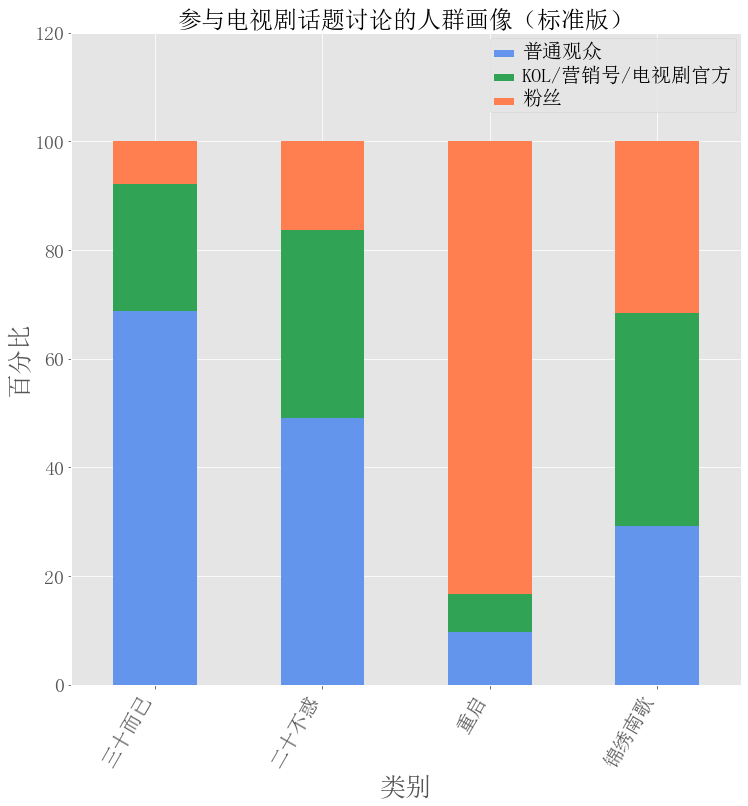

In [34]:
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))
category = new_data['category'].drop_duplicates()
print(category)
margin_bottom = np.zeros(len(new_data['topic'].drop_duplicates()))
colors = ["#6495ED", "#31A354","#FF7F50", "#00008B"]

for m, n in enumerate(category):
    print(m,n)
    values = list(new_data[new_data['category'] == n].loc[:, 'percentage'])
    color = colors[m]
    print(new_data[new_data['category'] == n])
    new_data[new_data['category'] == n].plot.bar(x='topic', y='percentage', ax=ax, stacked=True, 
                                                 bottom = margin_bottom, color=colors[m], label=n)
    margin_bottom += values
axes = plt.gca()
axes.set_ylim([0,120])

plt.xlabel('类别', fontsize=26)
plt.ylabel('百分比', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend=plt.legend(["普通观众", "KOL/营销号/电视剧官方", "粉丝"]) #Legend: list, location, Title (in bold)
legend.get_title().set_fontsize(15) 
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') 
axes.set_xticklabels(["三十而已", "二十不惑", "重启", "锦绣南歌"], rotation=60, horizontalalignment= 'right')
plt.title("参与电视剧话题讨论的人群画像（标准版）", fontsize=24)
plt.show()

In [35]:
category_dict2 = defaultdict(list)
for index, row in super_topic_category.iterrows():
    category = row["类别"]
    idx = row["超话"]
    if idx == "朱一龙超话":
        continue
    if str(category) == "nan":
        continue
    category_dict2[category].append(idx)

In [36]:
data_bias = add_new_columns(data, category_dict2)

In [37]:
#user_data = data.drop_duplicates(["topic", "uid"])
#user_data[["topic", "uid", "description", "user_follower_count", "user_verified_content", "super_topics", "cast_fans", "category"]].to_csv("verify_result.csv")
new_data = pd.DataFrame(data_bias.groupby('topic')["category"].value_counts(normalize=True) * 100)
new_data.columns = ["percentage"]
new_data = new_data.reset_index(level=["topic","category"])
#new_data.index
new_data

,topic,category,percentage
0,三十而已,普通观众,68.839562
1,三十而已,KOL/营销号/电视剧官方,23.264962
2,三十而已,粉丝,7.895476
3,二十不惑,普通观众,49.044753
4,二十不惑,KOL/营销号/电视剧官方,34.702957
5,二十不惑,粉丝,16.252290
6,重启之极海听雷,粉丝,78.617126
7,重启之极海听雷,普通观众,13.607283
8,重启之极海听雷,KOL/营销号/电视剧官方,7.775591
9,锦绣南歌,KOL/营销号/电视剧官方,39.206762


0             普通观众
1    KOL/营销号/电视剧官方
2               粉丝
Name: category, dtype: object
0 普通观众
      topic category  percentage
0      三十而已     普通观众   68.839562
3      二十不惑     普通观众   49.044753
7   重启之极海听雷     普通观众   13.607283
11     锦绣南歌     普通观众   29.226268
1 KOL/营销号/电视剧官方
     topic       category  percentage
1     三十而已  KOL/营销号/电视剧官方   23.264962
4     二十不惑  KOL/营销号/电视剧官方   34.702957
8  重启之极海听雷  KOL/营销号/电视剧官方    7.775591
9     锦绣南歌  KOL/营销号/电视剧官方   39.206762
2 粉丝
      topic category  percentage
2      三十而已       粉丝    7.895476
5      二十不惑       粉丝   16.252290
6   重启之极海听雷       粉丝   78.617126
10     锦绣南歌       粉丝   31.566970


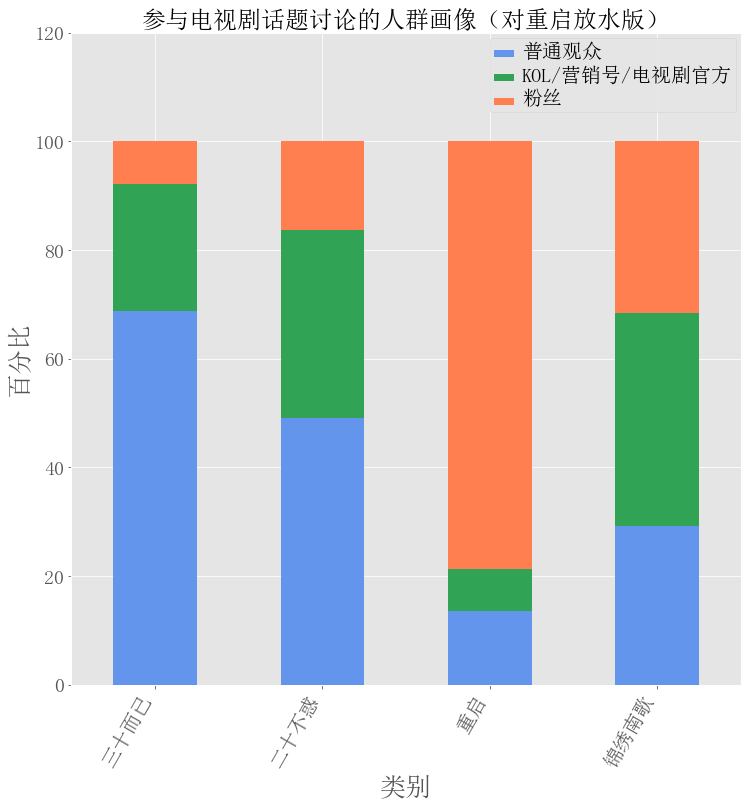

In [38]:
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))
category = new_data['category'].drop_duplicates()
print(category)
margin_bottom = np.zeros(len(new_data['topic'].drop_duplicates()))
colors = ["#6495ED", "#31A354","#FF7F50", "#00008B"]

for m, n in enumerate(category):
    print(m,n)
    values = list(new_data[new_data['category'] == n].loc[:, 'percentage'])
    color = colors[m]
    print(new_data[new_data['category'] == n])
    new_data[new_data['category'] == n].plot.bar(x='topic', y='percentage', ax=ax, stacked=True, 
                                                 bottom = margin_bottom, color=colors[m], label=n)
    margin_bottom += values
axes = plt.gca()
axes.set_ylim([0,120])

plt.xlabel('类别', fontsize=26)
plt.ylabel('百分比', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend=plt.legend(["普通观众", "KOL/营销号/电视剧官方", "粉丝"]) #Legend: list, location, Title (in bold)
legend.get_title().set_fontsize(15) 
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') 
axes.set_xticklabels(["三十而已", "二十不惑", "重启", "锦绣南歌"], rotation=60, horizontalalignment= 'right')
plt.title("参与电视剧话题讨论的人群画像（对重启放水版）", fontsize=24)
plt.show()

In [34]:
chongqi_text = ",".join(data_standard.loc[(data_standard["topic"] == "重启之极海听雷") & (data_standard["category"] != "KOL/营销号/电视剧官方")]["text"].to_list())
chongqi_text= re.sub("  ", " ", chongqi_text)
chongqi_text= re.sub("全文", "", chongqi_text)
chongqi_text

"18年的时候，有个站阿婆主介绍朱一龙的沈巍，形容他是： 【一夜之间所有脆皮鸭文学的男主都有了脸】 2020年了，连吴邪都因为朱一龙而有了脸。 谢谢你[愛你]  #朱一龙演技#  #朱一龙吴邪#  #朱一龙盗墓笔记重启#  #重启之极海听雷#  ,##重启# 当然是2啦，朱一龙吴邪写的[嘻嘻][嘻嘻][嘻嘻]#重启之极海听雷#,#朱一龙重启之极海听雷# [音乐]#朱一龙吴邪#   #重启之极海听雷#  哈哈哈哈哈哈哈哈，想看丧艾莉穿上吴品如的衣服  ,: #朱一龙演技#  朱一龙演技大写的🐂！ #朱一龙吴邪#    #重启之极海听雷#  @朱一龙 ,72全40 要的找她 @98年的夏夏老啊姨  二十不惑 ，梁爽在寝室哭诉，看我的心都碎了， 哭的委屈巴巴！不过爽姐对待渣男还是很的给他一巴掌 集美们一起来看 #二十不惑# 结局预告 关晓彤这里演技也太好了看他们红楼四子的怎么擦出火花  #重启之极海听雷#   喜欢的姐妹快来呀！ ,10集二刷了！但是还有好多细节要挖，朱一龙还有很多小设计要细看才行。这孩子会给我们藏好好多小宝贝等我们挖呢。 @朱一龙    #重启之极海听雷# ,&;; #朱一龙重启之极海听雷#  ⚡ #朱一龙吴邪#  ⚡ #重启之极海听雷#  重启之极海听雷朱一龙吴邪 @朱一龙 &;;我在 #微博剧集榜# ，观看了重启之极海听雷的精彩视频片段，快来和我一起围观热剧高光时刻！,/ #铁三角默契#    #重启之极海听雷#  恭喜重启!恭喜朱一龙!我们一起快乐追剧呀! @朱一龙 ,1555555实名羡慕，心疼朱朱  @朱一龙  #朱一龙吴邪#  ✨ #朱一龙重启之极海听雷#  朱一龙重启之极海听雷吴邪 #重启之极海听雷# // @演员-董宛鑫 :回复 @奶茶重度病患 :没真吐🤣拢龙太瘦啦，大家多应援让拢龙胖一点吧// @做梦的魔鬼200502 :辛苦了,#朱一龙重启之极海听雷# [音乐]#朱一龙吴邪# [音乐]#重启之极海听雷# [音乐]#朱一龙2020爱你不停# 朱一龙先生 雷起语未歇，万物惊声怯。谜团待解，冒险集结，加载完毕，朱一龙重启收视长虹。 早安朱一龙 @朱一龙 ,#朱一龙重启之极海听雷# [音乐]#朱一龙吴邪# [音乐]#重启之极海听雷# [音乐]#朱一龙演技# 这两天重启看得我太上头了！每集的信息量都巨大无比，值得反复刷的地方太多了！朱一龙演技真

In [36]:
thirty_text = ",".join(data_standard.loc[(data_standard["topic"] == "三十而已") & (data_standard["category"] != "KOL/营销号/电视剧官方")]["text"].to_list())
thirty_text= re.sub("  ", " ", thirty_text)
thirty_text = re.sub("全文", "", thirty_text)
thirty_text

"2020年刀在脖子上也要追的剧单已经帮你安排好了！ 《 #皓衣行#  》主演：罗云熙、陈飞宇 《 #有翡#  》主演：赵丽颖、王一博 《 #三十而已#  》主演：江疏影、童谣、毛晓彤 《 #你好喵室友#  》主演：郑云龙、马伯骞、杨天翔 《 #不说再见#  》主演：任嘉伦、张钧甯 《 #你是我的城池营垒#  》主演：马思纯、白敬亭 ...  ,   自古弹幕出人才超话  乘风破浪的姐姐，重新定义了姐姐。姐姐来了，赋予了姐姐这个词的温暖。三十而已，初老而已，没啥大不了。 #三十而已#  ,#三十而已# 也才三十岁而已,还很年轻,很多事情才刚刚开始,也有很多过往可以回忆,还是单身一人,可是不再害怕孤独,坚强而圆滑的面对所有的困难和回忆…… ,&;   你总是把这么多心事放在心里，当然不好瘦啦。&;  #沙雕日常#  #七月#  #三十而已#    东莞  ,23岁的我 已经更想看 #三十而已#  而不是二十了     ,2020待播的国产电视剧片单来了，猜猜哪部会爆？ 唯美耽改剧《 #皓衣行#  》主演：罗云熙、陈飞宇 古装剧《 #有翡#  》主演：赵丽颖、王一博 女性群像剧《 #三十而已#  》主演：江疏影、童谣、毛晓彤 治愈陪伴剧《 #你好喵室友#  》主演：郑云龙、马伯骞、杨天翔 都市缉毒剧《 #不说再见#  》主演：任嘉伦、张钧 ...  ,   自古弹幕出人才超话 到底是相克还是在一起了呢？又或者相爱相杀？ #三十而已#    哈尔滨·祥泰人家  ,#三十而已# 这剧前五集已经成功把我搞成恐婚恐育了 哭也是哭的很惨下 ,#三十而已# 看了20分钟 给了我3个广告  没买会员就这么欺负我 @腾讯视频  要钱不要脸的软件 真是服了 不看了 我应该继续卸载 沿用我的年会爱奇艺优酷 再见来不及挥手 ,2020/7/18 放假太闲，打开电视📺，各种找剧追，一个都看不进去，觉得各种假     ，各种幼稚没意思，一集都看不下去的节奏。晚上刷抖音，刷到 #三十而已#  ，竟默默看进去了，大概是年龄到了吧，觉得还不错～ 顾佳说：“我出月子那天，顾佳自己已经死了，活着的只是许子言的妈妈。” ...  ,30岁是人生低谷吗？不，它是一个崭新的开始，因为你褪去了稚嫩，有了更开阔的眼界，你更加坚强勇敢，你在往更好的方向走去！ #三十而已#    _先生7177的微博视频  ,29岁的

In [37]:
twenty_text = ",".join(data_standard.loc[(data_standard["topic"] == "二十不惑") & (data_standard["category"] != "KOL/营销号/电视剧官方")]["text"].to_list())
twenty_text= re.sub("  ", " ", twenty_text)
twenty_text = re.sub("全文", "", twenty_text)
twenty_text

"7月15日 59 卫视 黄金剧场电视剧 收视 1 #二十不惑# （湖南） 2 #爱我就别想太多# （上海） 3 #局中人# （浙江） 4 #局中人# （江苏） 5 #爱我就别想太多# （北京） 【数据缺：泸州】 ,7月16日 59 卫视 黄金剧场电视剧 收视 1 #二十不惑# （湖南） 2 #爱我就别想太多# （上海） 3 #局中人# （浙江） 4 #局中人# （江苏） 5 #爱我就别想太多# （北京）【数据缺：泸州】 ,#二十不惑 #看了预告很喜欢三十而已为孩子拼命的妈妈   这段时间还看了二十不惑，很怀念青春生活，希望可以多出一些女性题材的电视剧。 ,-----------------🌴----------------- \xa0\xa0\xa0        👰🏻厦门婚纱摄影慕爱旅拍 \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0           海边客片推荐👗   海边花絮~~  #慕爱每日客照#  #厦门拍婚纱照#  #二十不惑#    厦门婚纱摄影慕爱的微博视频  ,97年同事跟我说“二十不惑”很好看 我内心: 我其实更想看三十而已 这就是大2岁的代沟   #二十不惑#  #三十而已#  ,#二十不惑 #关晓彤20岁时被骂哭 我只选择做自己，抱歉，顺从不了 #关晓彤#   追星女孩刘淑芬的微博视频  ,#二十不惑 #关晓彤20岁时被骂哭 我只选择做自己，抱歉，顺从不了  #关晓彤#    追星女孩刘淑芬的微博视频  ,1️⃣：吃了一顿代替火锅的麻辣烫✅ 2⃣️：买到了去年在贵州吃到的小时候味道的葡萄，贼香，开心✅ 3⃣️：买了自己喜欢的花，开心🥳 4⃣️：亲眼👀别人求婚了，哦嚯嚯💓 这个周末从今天晚上正式开始啦✨等会去追剧《二十不惑》还挺好看呢   长沙超话  #吃喝玩乐#  #二十不惑#  ...  ,93年的宝宝，应该追《二十不惑》还是追《三十而已》呢？ #二十不惑#  #三十而已#  ,#二十不惑 # #三十而已#  这两部剧说实话真适合90前后的人观看，90前的看了感慨自己悼念青春。 90后的看了刚走过毕业后工作的尴尬无助期又要迎来人生的重要转折，应该踏入婚姻还是拼自己的事业。 ,#二十不惑 # #三十而已#  最近有剧追啦 ,#二十不惑 # #梁爽知错#  “我们都是这个新世界的实

In [ ]:
jinxiu_text = ",".join(data.loc[data["topic"] == "锦绣南歌"]["text"].to_list())
jinxiu_text = re.sub("全文", "", jinxiu_text)
jinxiu_text

In [38]:
discussion = pd.read_csv("data/chongqi/集均讨论.csv")

In [39]:
discussion.loc[discussion["版本"]=="标准"]

,电视剧,播放集数,微博话题发帖数,集均讨论度,普通观众占比,普通观众集均讨论度,版本
0,三十而已,5,456000,91200,67.4%,61468.8,标准
1,二十不惑,8,1449000,181125,50.0%,90562.5,标准
2,重启,10,3890000,389000,9.8%,38122.0,标准
3,锦绣南歌,24,3889000,162041,28.64%,46408.5,标准


Text(0.5, 1.0, '普通观众集均讨论度对比(重启放水版)截止2020/07/19')

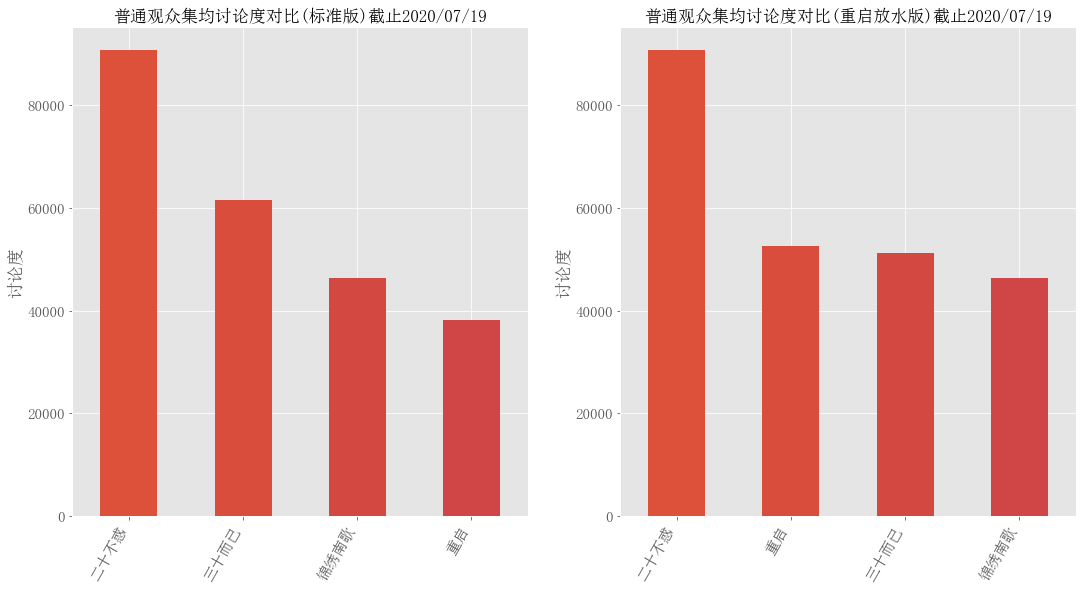

<Figure size 960x640 with 0 Axes>

In [40]:
from matplotlib import cm
import numpy as np
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(18,9))
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure(figsize=(12,8), dpi= 80)
sorted_discussion1 = discussion.loc[discussion["版本"]=="标准"].sort_values(by="普通观众集均讨论度", ascending=False)
sorted_discussion1["普通观众集均讨论度"].plot.bar(color=color, ax=axes[0])
axes[0].set_xticklabels(sorted_discussion1["电视剧"], rotation=60, horizontalalignment= 'right', fontsize=15)
axes[0].set_yticklabels([0, 20000,40000,60000,80000], fontsize=15)
axes[0].set_ylabel("讨论度", fontsize=17)
axes[0].set_title("普通观众集均讨论度对比(标准版)截止2020/07/19", fontsize=17)

sorted_discussion2 = discussion.loc[discussion["版本"]=="放水"].sort_values(by="普通观众集均讨论度", ascending=False)
sorted_discussion2["普通观众集均讨论度"].plot.bar(color=color, ax=axes[1])
axes[1].set_xticklabels(sorted_discussion2["电视剧"], rotation=60, horizontalalignment= 'right', fontsize=15)
axes[1].set_yticklabels([0, 20000,40000,60000,80000], fontsize=15)
axes[1].set_ylabel("讨论度", fontsize=17)
axes[1].set_title("普通观众集均讨论度对比(重启放水版)截止2020/07/19", fontsize=17)